# 🏠 Análise do Mercado Imobiliário em Lisboa com Dados do Airbnb
Este projeto tem como objetivo explorar e analisar dados públicos de imóveis disponíveis no Airbnb na cidade de Lisboa.

**Autor:** Lisandro Almeida Viana

## 🎯 Objetivos da Análise
- Entender a distribuição de preços dos imóveis
- Comparar valores por tipo de acomodação
- Avaliar a disponibilidade por região
- Identificar bairros com maior oferta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 📥 Carregamento dos dados (amostra)

In [3]:
df = pd.read_csv('/content/listings_amostra.csv')

In [4]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33472863,https://www.airbnb.com/rooms/33472863,20220913165728,2022-09-13,city scrape,Quinta de Vitae- Quinta ecologica,"Lisboa, Mafra, Gradil, Portugal<br />Mafra des...","Este local é um espaço agricola/florestal, con...",https://a0.muscache.com/pictures/1c2cd98e-a00b...,99118858,...,5.00,5.00,5.00,106519/AL,f,1,1,0,0,0.12
1,34825539,https://www.airbnb.com/rooms/34825539,20220913165728,2022-09-14,city scrape,P. NAÇÕES-(ALOJAMENTO/PEQ. ALMOÇO AMERICANO ),BED AND AMERICAN BREAKFAST! <br />Suíte privad...,Para mim é o sítio melhor para viver em Lisboa...,https://a0.muscache.com/pictures/7285d959-d21c...,155427788,...,4.88,4.85,4.78,Exempt,f,5,0,5,0,1.83
2,667019762408012884,https://www.airbnb.com/rooms/667019762408012884,20220913165728,2022-09-14,city scrape,Olala Rainbow Suite 2,The rent by room in Cascais has 1 bedrooms and...,Olala Jardim Room 2 puts you minutes away from...,https://a0.muscache.com/pictures/miso/Hosting-...,129000409,...,NaN,NaN,NaN,129957/AL,t,43,25,18,0,NaN
3,24321124,https://www.airbnb.com/rooms/24321124,20220913165728,2022-09-14,city scrape,TravelingToLisbon 321 - Baixa,"2 Bedroom duplex apartment in the Baixa area, ...",Located in the Baixa district. From here you c...,https://a0.muscache.com/pictures/889ae24f-83cc...,140893245,...,4.14,4.57,3.71,38118/AL,t,37,37,0,0,1.63
4,27131006,https://www.airbnb.com/rooms/27131006,20220913165728,2022-09-14,city scrape,Studio 15 - Martim Moniz,"Studio 15 is a new, very well decorated and co...",Mouraria is where the Moors were allowed to li...,https://a0.muscache.com/pictures/3b390fd5-ceb7...,204237813,...,5.00,4.84,4.85,74782/AL,t,1,1,0,0,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,564331618376572525,https://www.airbnb.com/rooms/564331618376572525,20220913165728,2022-09-14,city scrape,TARGA - One bedroom apartment with balcony in ...,Our mission is to empower individuals to immer...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,419162816,...,NaN,NaN,NaN,Exempt,t,50,50,0,0,NaN
1961,27981401,https://www.airbnb.com/rooms/27981401,20220913165728,2022-09-14,city scrape,Hotel Lisboa Plaza - Petite Room,Cozy rooms with one Double bed or Two single b...,NaN,https://a0.muscache.com/pictures/8d17a71b-a817...,210921303,...,NaN,NaN,NaN,231,t,5,0,0,0,NaN
1962,35523939,https://www.airbnb.com/rooms/35523939,20220913165728,2022-09-13,city scrape,Room between Lisbon and Sintra,Room located 1.5 km from Cacém train station. ...,"Calm neighborhood with place, on the public ro...",https://a0.muscache.com/pictures/ec2a75d8-8c70...,23299753,...,5.00,4.84,4.84,46999/AL,t,1,0,1,0,0.52
1963,24239024,https://www.airbnb.com/rooms/24239024,20220913165728,2022-09-14,city scrape,Principe Real Lightful and Charming,This is a one bedroom apartment located in the...,Principe Real might be best known for its anti...,https://a0.muscache.com/pictures/37f9a7e4-818f...,182752613,...,4.92,4.89,4.77,68572/AL,t,1,1,0,0,3.62


## 🔍 Seleção de colunas relevantes

In [5]:
colunas = [
    'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights', 'availability_365',
    'number_of_reviews', 'review_scores_rating']
df = df[colunas]

## 🧹 Limpeza e pré-processamento

In [7]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)
df = df[(df['price'] > 0) & (df['minimum_nights'] < 365)]

## 📊 Visualização 1: Distribuição de preços

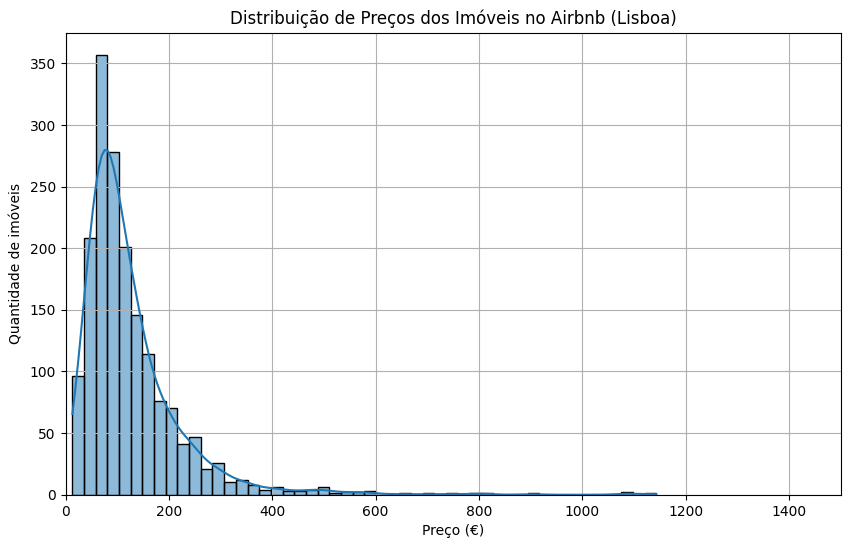

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição de Preços dos Imóveis no Airbnb (Lisboa)')
plt.xlabel('Preço (€)')
plt.ylabel('Quantidade de imóveis')
plt.xlim(0, 1500)
plt.grid(True)
plt.show()

## 📊 Visualização 2: Preço por tipo de acomodação

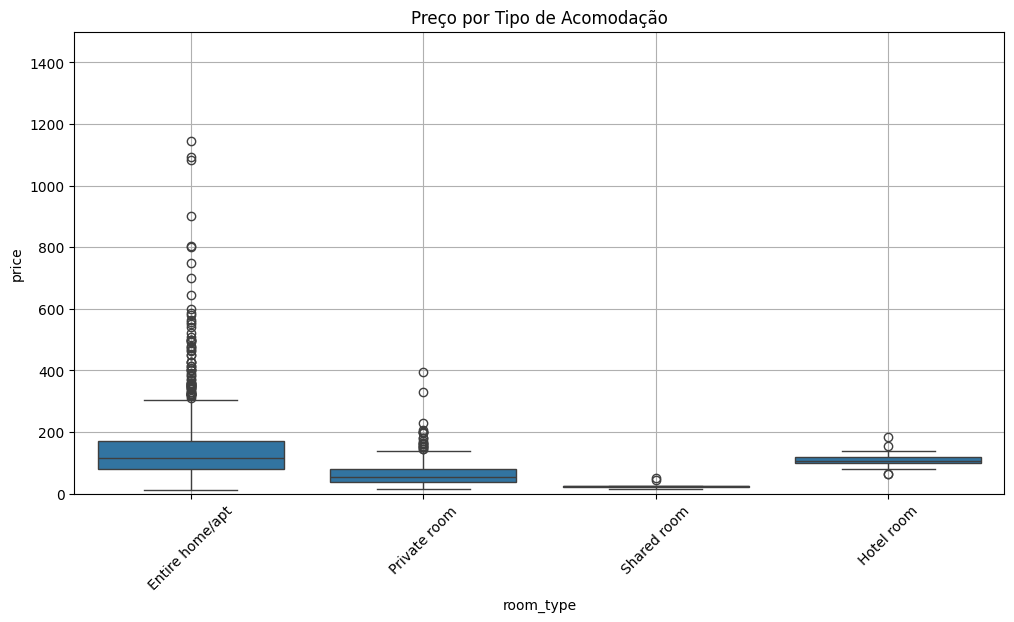

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Preço por Tipo de Acomodação')
plt.xticks(rotation=45)
plt.ylim(0, 1500)
plt.grid(True)
plt.show()

## 📊 Visualização 3: Disponibilidade por bairro (Top 10)

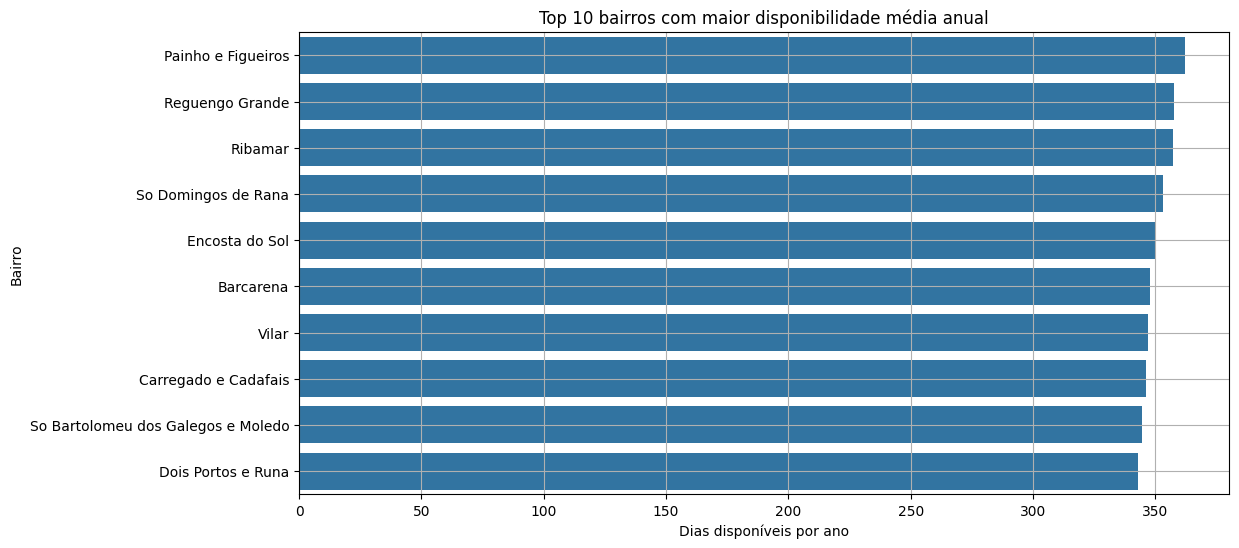

In [13]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('neighbourhood_cleansed')['availability_365'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=df_grouped.values, y=df_grouped.index)
plt.title('Top 10 bairros com maior disponibilidade média anual')
plt.xlabel('Dias disponíveis por ano')
plt.ylabel('Bairro')
plt.grid(True)
plt.show()

## 📈 Análise de Correlação entre variáveis numéricas

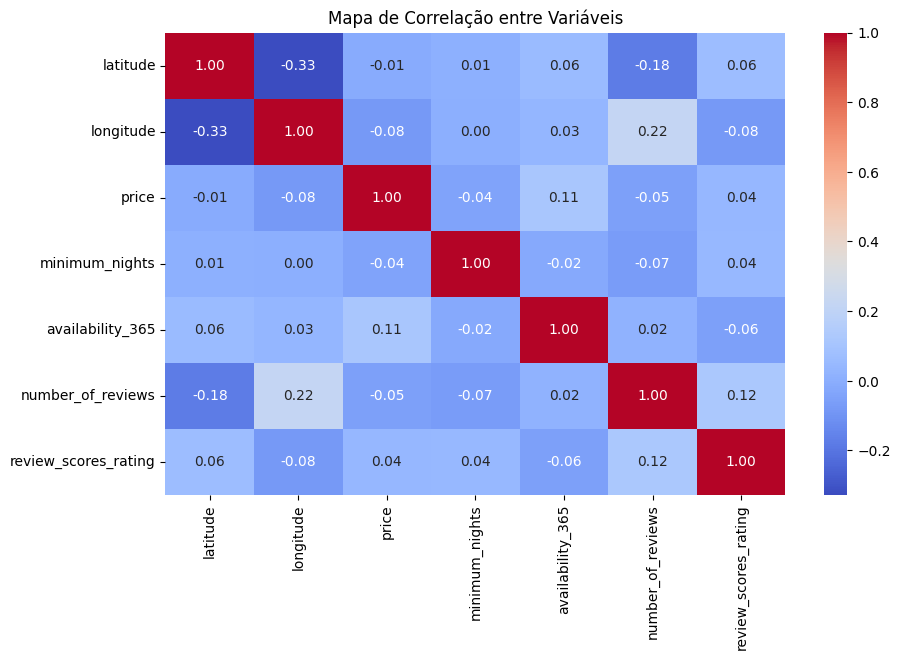

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

## 💡 Insights e Observações Iniciais

In [15]:
print("\n🔍 Principais insights:")
print("- Correlação moderada entre review_scores_rating e preço")
print("- Número de noites mínimas não influencia muito o preço")
print("- Número de avaliações pode ter relação com disponibilidade e localização")


🔍 Principais insights:
- Correlação moderada entre review_scores_rating e preço
- Número de noites mínimas não influencia muito o preço
- Número de avaliações pode ter relação com disponibilidade e localização


## 🤖 Modelo Preditivo: Regressão Linear

In [17]:
df_model = df[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating']]
X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📊 Resultados da Regressão Linear:")
print("R² Score:", r2_score(y_test, y_pred))
# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # or use np.sqrt(mse)
print("Erro Quadrático Médio (RMSE):", rmse)


📊 Resultados da Regressão Linear:
R² Score: 0.005104885043067053
Erro Quadrático Médio (RMSE): 108.55906678851633
